In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [183]:

def kcrust1(T,z):
    k0 = 3.0
    b = 1.5e-3
    T = T - 273.15
    return k0**(1 + 1.5e-3 * z/1e3) / (1+b*T)
def kcrust2(T,z):
    k0 = 2.6
    b = 1.0e-4
    T = T - 273.15
    return k0**(1 + 1.5e-3 * z/1e3) / (1+b*T)
def kcrust3(T,z):
    """ 
Calculation of Thermal Conductivity of the Mantle determined from T and z
Schatz, J. F., and G. Simmons (1972), Thermal conductivity of earth 
    materials at high temperatures, Journal of Geophysical Research, 
    77(35), 6966–6983.
    """
    # Schatz and Simmons, 1972, Eqn (9) pg 6975
    #    Temperature in Kelvin
    #    31 (calories / s C))^-1 = 7.409177e-2 (W/(m K))^-1
    #    0.21 (calories / s C))^-1 = 5.0191204e-4 (W/(m K))^-1
    a = 7.4091778e-2
    b = 5.0191204e-4
    kl = 1.0/(a + b * T)
    # Schatz and Simmons, 1972, Eqn (10)
    #    Temperature in Kelvin
    #    (W / (m K)) / (calories / s C) = 418.4
    #    5.5e-6 (calories / s C) = 2.3e-3 (W / (m K))
    kr = 0.0
    if T > 500.0:
        d = 2.3e-3 
        kr = d * (T-500.0)
    # Schatz and Simmons, 1972, Eqn (11)
    #    z in 1000's of km, hence 1e3 for m -> km and 1e3 for 1km -> 1000km
    #    0.003 (calories / s C) = 1.255199 (W / (m K))
    c = 1.255199
    klmin =  c * (1.0 + z /1e6)
    return klmin + max(kl, kr)

9e-07 5.1e-07 8.999999999999999e-08 3.0
5e-07


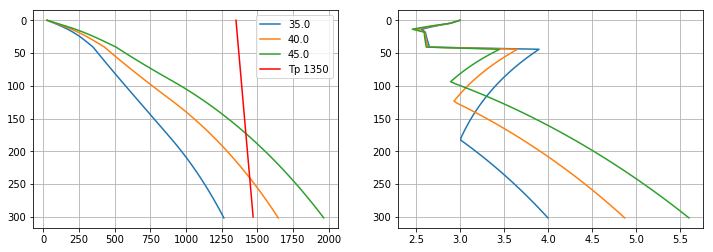

In [263]:
hc = 41e3 # crustal thickness
f = 3.0
huc = hc/f
hmc = hc/f
hlc = hc/f

Qs = 40e-3 # W/m^3

A0 = 0.50e-6
Auc = A0 * 0.60 * f
Amc = A0 * 0.34 * f
Alc = A0 * 0.06 * f
Ali = 0.019e-6 
print(Auc,Amc,Alc,f)
print((Auc + Amc + Alc)/3)
T0 = 25.0 + 273.15

plt.figure(figsize=(12,4))
z = list(np.linspace(0.0, hc, 10))

z.extend( np.arange(z[-1],303e3,3.3e3)[1:] )

Av = [Ali] * len(z)
Av[0:3] = [Auc]*3
Av[3:6] = [Amc]*3
Av[6:9] = [Alc]*3

kfunc = [kcrust3]*len(z)
kfunc[0:3] = [kcrust1]*3
kfunc[3:6] = [kcrust2]*3
kfunc[6:9] = [kcrust2]*3

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

for Qs in [35e-3,40e-3,45e-3]:
    q,T,kv = [Qs], [T0], [3.0]
    for i in range(1,len(z)):
        dz = z[i]-z[i-1]
        k = kfunc[i-1](T[i-1],z[i-1])
        A = Av[i-1]
        ti = T[i-1] + q[i-1]*dz/k - (A*dz**2)/(2*k)
        qi = q[i-1] - A*dz
        
        T.append(ti)
        q.append(qi)
        kv.append(k)
        A = 0
        k = 0
    z = np.array(z)
    T = np.array(T) - 273.15
    ax2.plot(kv,z/1e3)
    ax1.plot(T,z/1e3,label=str(Qs*1e3))

Tp, dTdkm, zmax = 1350, 0.4, 300.0
Ta = [Tp,Tp + dTdkm * zmax]
za = [0,300]
ax1.plot(Ta,za,'r',label='Tp ' + str(Tp))
ax1.legend()

ax1.invert_yaxis()
ax1.grid()
ax2.invert_yaxis()
ax2.grid()

In [172]:
WPMK_per_CPSC = 418.4

In [173]:
5.5e-6 * WPMK_per_CPSC

0.0023011999999999998

In [174]:
0.003 * WPMK_per_CPSC

1.2551999999999999

In [181]:
31 / WPMK_per_CPSC

0.07409177820267687

In [182]:
0.21 / WPMK_per_CPSC

0.0005019120458891013

In [195]:
z[:10]

array([    0.        ,  4555.55555556,  9111.11111111, 13666.66666667,
       18222.22222222, 22777.77777778, 27333.33333333, 31888.88888889,
       36444.44444444, 41000.        ])

In [200]:
np.linspace(0.0,hc,10)

array([    0.        ,  4555.55555556,  9111.11111111, 13666.66666667,
       18222.22222222, 22777.77777778, 27333.33333333, 31888.88888889,
       36444.44444444, 41000.        ])

In [207]:
z1 = z

In [209]:
z-z1

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.81898940e-12,
       0.00000000e+00, 0.00000000e+00, 3.63797881e-12, 3.63797881e-12,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [243]:
huc,huc+hmc,huc+hmc+hlc

(13666.666666666666, 27333.333333333332, 41000.0)

In [248]:
Av

[9e-07,
 9e-07,
 9e-07,
 5.1e-07,
 5.1e-07,
 5.1e-07,
 8.999999999999999e-08,
 8.999999999999999e-08,
 8.999999999999999e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08,
 1.9e-08]